# Redes Neuronales

## Perceptrón y Función de Activación
El perceptrón es una unidad básica de procesamiento en redes neuronales que toma múltiples entradas, aplica pesos y bias, y utiliza una función de activación para producir una salida.


### Estructura del Perceptrón

- *Entradas*: El perceptrón recibe varias entradas (características), representadas por un vector. Cada entrada puede ser un número que representa algún atributo del dato que se está analizando (por ejemplo, el color de un pixel en una imagen).



- *Pesos*: Cada entrada tiene un peso asociado que indica su importancia en la decisión que el perceptrón tomará. Estos pesos se inicializan aleatoriamente y se ajustan durante el proceso de entrenamiento.

- *Bias*: Se añade un valor llamado **bias** (sesgo) a la suma ponderada de las entradas. El bias permite al perceptrón ajustar su salida de manera que no dependa únicamente de las entradas.

- *Suma Ponderada*: El perceptrón calcula una **suma ponderada** de las entradas, que se expresa matemáticamente como

$$
z = \sum (w_i \cdot x_i) + b
$$

donde:
- $w_i$ son los **pesos** asociados a cada entrada,
- $x_i$ son las **entradas** (características) del dato,
- $b$ es el **bias** (sesgo) que permite ajustar la salida del modelo.

**Función de Activación**  
- La suma ponderada $z$ se pasa a través de una **función de activación** con el objetivo de introducir no linealidad al modelo matemático dado por la red (notese que la composición de sumas ponderadas es a su vez una suma ponderada).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def plot_act_fun(f, x_range=(-5, 5)):
    title=f"Función {f.__name__}"
    x = np.linspace(*x_range, 400)
    y = f(x)

    plt.figure(figsize=(4, 2))
    plt.plot(x, y, label=f.__name__, color='b')
    plt.axhline(0, color='black', linewidth=0.5, linestyle="--")
    plt.axvline(0, color='black', linewidth=0.5, linestyle="--")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.title(title)
    plt.legend()
    plt.show()

**Función Escalón**

$$
f(x) =
\begin{cases}
1 & \text{si } x \geq 0 \\
0 & \text{si } x < 0
\end{cases}
$$

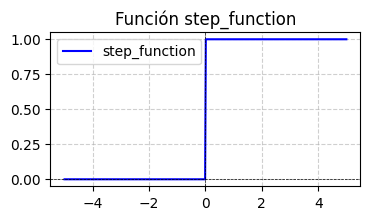

In [2]:
def step_function(x):
    return np.where(x >= 0, 1, 0)
plot_act_fun(step_function)

**Función Sigmoide**

$$\sigma(x) = \frac{1}{1 + e^{-x}}$$


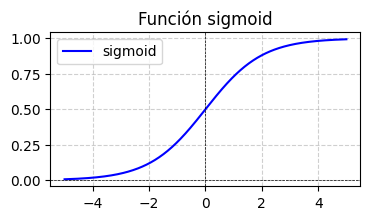

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

plot_act_fun(sigmoid)

**Función Tangente Hiperbólica (Tanh)**

$$\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$$

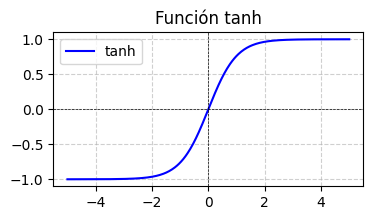

In [4]:
def tanh(x):
    return np.tanh(x)
plot_act_fun(tanh)

**Función ReLU (Rectified Linear Unit)**


$$ReLU(x) = \max(0, x)$$


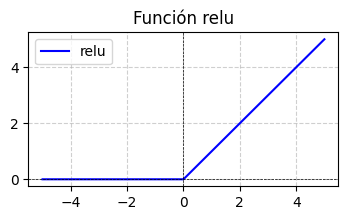

In [5]:
def relu(x):
    return np.maximum(0, x)
plot_act_fun(relu)

**Función Leaky ReLU**

$$
LeakyReLU(x) =
\begin{cases}
x, & x > 0 \\
\alpha x, & x \leq 0
\end{cases}$$

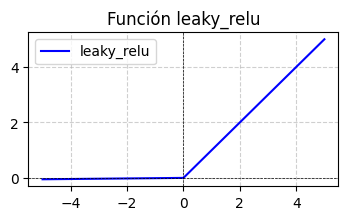

In [6]:
def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)
plot_act_fun(leaky_relu)

**Función Softplus**

$$Softplus(x) = \ln(1 + e^x)$$


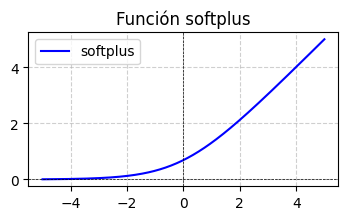

In [7]:
def softplus(x):
    return np.log(1 + np.exp(x))
plot_act_fun(softplus)

## Caso de estudio: Entrena un perceptrón para simular la compuerta lógica AND

Definimos los datos de entrada $x$ y la salida deseada $y$

Los datos de entrada se definen en una matriz $x$, donde cada fila representa un conjunto de entradas para la función lógica AND. La salida deseada se define en el vector $y$.






| $x\_1$ | x_2 | y |
|---------|---------|-------|
|    0    |    0    |   0   |
|    0    |    1    |  0   |
|    1    |    0    |   0   |
|    1    |    1    |   1   |





1. Definir la función de activación (escalón), esta funciom decide si una neurona "se activa" (`1`) o no (`0`), dependiendo de si el valor de entrada es mayor o menor que cero. Matemáticamente, se puede expresar como:
   
$$
f(x) =
\begin{cases}
1 & \text{si } x \geq 0 \\
0 & \text{si } x < 0
\end{cases}
$$

In [8]:
def step_function(x):
    return 1 if x >= 0 else 0

salida=step_function(0)
salida

1

2. Definir  los **datos de entrada** `X` que alimentarán la neurona, así como la **salida esperada** `y` que se desea obtener.

In [9]:
import numpy as np

X = np.array([[0, 0],  # and(0, 0) = 0
              [0, 1],  # and(0, 1) = 0
              [1, 0],  # and(1, 0) = 0
              [1, 1]]) # and(1, 1) = 1

y = np.array([0, 0, 0, 1])  # salidas deseadas

3.  Inicializar pesos, bias y tasa de aprendizaje

In [10]:
w = np.zeros(2)  # 2 entradas → 2 pesos, todos en 0
b = 1            # Bias empieza en 1
learning_rate = 1

4.  El **entrenamiento** comienza con la **primera época**, que consiste en una pasada completa por todos los datos de entrenamiento.  
Durante esta etapa, el modelo empieza a ajustar sus parámetros (pesos y sesgo) para aprender a hacer predicciones.


* **Se calcula el producto punto entre las entradas y los pesos, más el bias:**

$$z = X[i] \cdot w + b$$
$$z = \sum_{j=1}^{n} x_j \cdot w_j + b = X_i \cdot w + b$$

In [11]:

z = np.dot(X, w) + b
print("z=",z)

z= [1. 1. 1. 1.]


5. Aplicar la función de activación a todo el vector

In [12]:
def step_function(x):
    return np.where(x >= 0, 1, 0)

y_predic = step_function(z)
print("Predicciones:", y_predic)

Predicciones: [1 1 1 1]


En la tabla vemos las predicciones

| $x_1$ | $x_2$ | $y$ (real) | $\hat{y}$ (predicho) |
|-------|-------|------------|------------------------|
|   0   |   0   |     0      |          1             |
|   0   |   1   |     0      |          1             |
|   1   |   0   |     0      |          1             |
|   1   |   1   |     1      |          1             |


6. Se calcula el error, comparamos la **salida real** `y`   con la **predicción** `y_predic` obtenida por el modelo.
El error se calcula como:

$$\text{error} = y - \hat{y}$$

In [13]:
error = y - y_predic
error

array([-1, -1, -1,  0])

7. Se actulizan los pesos y el bias  

$$w = w + \eta \cdot X^\top \cdot \text{error}$$

$$w = w + \eta \cdot \begin{bmatrix}
x_{11} & x_{12} \\
x_{21} & x_{22} \\
x_{31} & x_{32} \\
x_{41} & x_{42}
\end{bmatrix}^\top
\cdot
\begin{bmatrix}
e_1 \\
e_2 \\
e_3 \\
e_4
\end{bmatrix}$$


$$ w= w + \eta \cdot
\begin{bmatrix}
x_{11} \cdot e_1 + x_{21} \cdot e_2 + x_{31} \cdot e_3 + x_{41} \cdot e_4 \\
x_{12} \cdot e_1 + x_{22} \cdot e_2 + x_{32} \cdot e_3 + x_{42} \cdot e_4
\end{bmatrix}$$

Donde
*  $\mathbf{w}$: vector de pesos.  
* $ \eta$ : tasa de aprendizaje (*learning rate*).   
* $ \mathbf{X} $: matriz de entrada, donde cada fila representa un ejemplo y cada columna una característica.  
​

In [14]:
w += learning_rate * np.dot(X.T, error)
b += learning_rate * np.sum(error)

print(w,b)

[-1. -1.] -2
